In [1]:
using Luxor
using MathTeXEngine

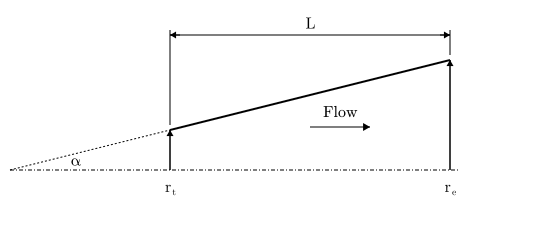

In [20]:
Drawing(550, 250, "../images/conical-nozzle.svg")
background("white")
origin(Point(170, 170))
sethue("black")

# === Nozzle geometry parameters ===
throat_x = 0
throat_r = 40
exit_x = 280
exit_r = 110
centerline_y = 0

# Calculate the angle of the nozzle wall
nozzle_angle = atan((exit_r - throat_r) / (exit_x - throat_x))

# Meeting point for the dashed lines (where centerline and angled line meet)
meeting_x = throat_x - throat_r / tan(nozzle_angle)
meeting_point = Point(meeting_x, centerline_y)

# === Arrow helper function ===
function draw_arrow(from::Point, to::Point; headsize=8)
    line(from, to, :stroke)
    angle = atan(to.y - from.y, to.x - from.x)
    p1 = Point(to.x - headsize * cos(angle - π/6), to.y - headsize * sin(angle - π/6))
    p2 = Point(to.x - headsize * cos(angle + π/6), to.y - headsize * sin(angle + π/6))
    poly([to, p1, p2], :fill)
end

# === Draw centerline (dash-dot pattern) ===
setline(1)
setdash([4.0, 2.0, 1.0, 2.0])  # dash-dot pattern
line(meeting_point, Point(exit_x + 10, centerline_y), :stroke)
setdash("solid")

# === Draw dashed line before throat (same angle as nozzle wall, meeting at centerline) ===
setline(1)
setdash([2.0, 2.0])
line(meeting_point, Point(throat_x, -throat_r), :stroke)
setdash("solid")

# === Draw conical nozzle wall (solid line from throat to exit) ===
setline(2)
line(Point(throat_x, -throat_r), Point(exit_x, -exit_r), :stroke)

# === Draw throat radius indicator ===
setline(1)
line(Point(throat_x, centerline_y), Point(throat_x, -throat_r), :stroke)
# Arrowhead at top - now contacts the wall exactly
draw_arrow(Point(throat_x, centerline_y), Point(throat_x, -throat_r), headsize=7)

# === Draw exit radius indicator ===
line(Point(exit_x, centerline_y), Point(exit_x, -exit_r), :stroke)
# Arrowhead at top - now contacts the wall exactly
draw_arrow(Point(exit_x, centerline_y), Point(exit_x, -exit_r), headsize=7)

# === Draw length dimension (L) ===
dim_y = -exit_r - 25
# Vertical extension lines
line(Point(throat_x, -throat_r - 5), Point(throat_x, dim_y - 5), :stroke)
line(Point(exit_x, -exit_r - 5), Point(exit_x, dim_y - 5), :stroke)
# Horizontal dimension line with arrows
line(Point(throat_x, dim_y), Point(exit_x, dim_y), :stroke)
draw_arrow(Point(throat_x + 10, dim_y), Point(throat_x, dim_y), headsize=7)
draw_arrow(Point(exit_x - 10, dim_y), Point(exit_x, dim_y), headsize=7)

# === Draw flow arrow ===
setline(1)
flow_y = -throat_r - (exit_r - throat_r) * 0.4 + 25
flow_x = throat_x + (exit_x - throat_x) * 0.5
draw_arrow(Point(flow_x, flow_y), Point(flow_x + 60, flow_y), headsize=8)

# === Labels ===
fontsize(16)

# r_th label (below centerline at throat)
text(L"r_{t}", Point(throat_x, centerline_y + 20), halign=:center, valign=:middle)

# r_e label (below centerline at exit)
text(L"r_e", Point(exit_x, centerline_y + 20), halign=:center, valign=:middle)

# α label (angle) - positioned between the two dashed lines
text(L"\alpha", Point(meeting_x + 65, centerline_y - 8), halign=:center, valign=:middle)

# L label (length dimension)
text(L"L", Point((throat_x + exit_x)/2, dim_y - 12), halign=:center, valign=:middle)

# Flow label
text(L"\text{Flow}", Point(flow_x + 30, flow_y - 10), halign=:center, valign=:bottom)

finish()
preview()

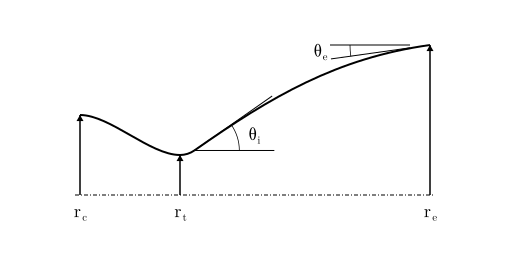

In [50]:
Drawing(520, 280, "../images/bell-nozzle.svg")
background("white")
origin(Point(80, 195))
sethue("black")

# === Nozzle geometry parameters ===
# Converging section
conv_start_x = 0
conv_start_r = 80  # radius at start of converging section

# Throat
throat_x = 100
throat_r = 40

# Exit
exit_x = 350
exit_r = 150

centerline_y = 0

# Initial angle after throat (θ_i) and exit angle (θ_e)
theta_i = 35 * π / 180  # 35 degrees - steeper initial angle
theta_e = 8 * π / 180   # 8 degrees - shallower exit angle

# === Arrow helper function ===
function draw_arrow(from::Point, to::Point; headsize=10)
    line(from, to, :stroke)
    angle = atan(to.y - from.y, to.x - from.x)
    p1 = Point(to.x - headsize * cos(angle - π/6), to.y - headsize * sin(angle - π/6))
    p2 = Point(to.x - headsize * cos(angle + π/6), to.y - headsize * sin(angle + π/6))
    poly([to, p1, p2], :fill)
end

# === Draw centerline (dash-dot pattern) ===
setline(1)
setdash([4.0, 2.0, 1.0, 2.0])
line(Point(-5, centerline_y), Point(exit_x + 5, centerline_y), :stroke)
setdash("solid")

# === Draw nozzle wall ===
setline(2)

# Top wall - converging section (smooth curve ending horizontal at throat)
move(Point(conv_start_x, -conv_start_r))
curve(
    Point(conv_start_x + 30, -conv_start_r),
    Point(throat_x - 30, -throat_r),
    Point(throat_x, -throat_r)
)
strokepath()

# === Diverging section with smooth transition ===
# Circular arc at throat that starts horizontal and curves outward
arc_radius = 25

# Arc center is BELOW the throat point (farther from centerline, more negative y)
arc_center = Point(throat_x, -throat_r - arc_radius)

# Inflection point where circular arc meets parabola
inflection_x = throat_x + arc_radius * sin(theta_i)
inflection_r = throat_r + arc_radius * (1 - cos(theta_i))

# Draw circular arc from throat to inflection point
move(Point(throat_x, -throat_r))
carc(arc_center, arc_radius, π/2, π/2 - theta_i, :stroke)

# Parabolic section from inflection to exit
# Use a cubic Bezier for better control of the parabolic shape
dx = exit_x - inflection_x
dy = exit_r - inflection_r

# Control points for cubic Bezier to create parabolic curve
# First control point: along the initial tangent direction
cp1_dist = dx * 0.4  # distance along initial tangent
cp1_x = inflection_x + cp1_dist * cos(theta_i)
cp1_y = inflection_r + cp1_dist * sin(theta_i)

# Second control point: along the exit tangent direction (backwards from exit)
cp2_dist = dx * 0.4  # distance along exit tangent (from exit, going backward)
cp2_x = exit_x - cp2_dist * cos(theta_e)
cp2_y = exit_r - cp2_dist * sin(theta_e)

# Draw parabolic section (cubic Bezier)
move(Point(inflection_x, -inflection_r))
curve(
    Point(cp1_x, -cp1_y),
    Point(cp2_x, -cp2_y),
    Point(exit_x, -exit_r)
)
strokepath()

# === Draw throat radius indicator ===
setline(1)
line(Point(throat_x, centerline_y), Point(throat_x, -throat_r), :stroke)
draw_arrow(Point(throat_x, centerline_y), Point(throat_x, -throat_r), headsize=7)

# === Draw exit radius indicator ===
line(Point(exit_x, centerline_y), Point(exit_x, -exit_r), :stroke)
draw_arrow(Point(exit_x, centerline_y), Point(exit_x, -exit_r), headsize=7)

# === Draw converging section start radius indicator ===
line(Point(conv_start_x, centerline_y), Point(conv_start_x, -conv_start_r), :stroke)
draw_arrow(Point(conv_start_x, centerline_y), Point(conv_start_x, -conv_start_r), headsize=7)

# === Draw initial angle indicator (θ_i) - lines extending past nozzle with curved arrow ===
setline(1)
angle_ref_len_horiz = 80
angle_ref_len_angled = 95  # Longer for the angled line

# Horizontal reference line (starting at inflection point, extending to the right)
horiz_end_x = inflection_x + angle_ref_len_horiz
line(Point(inflection_x, -inflection_r), Point(horiz_end_x, -inflection_r), :stroke)

# Angled line along tangent direction (starting at inflection point, extending past nozzle)
tangent_end_x = inflection_x + angle_ref_len_angled * cos(theta_i)
tangent_end_y = inflection_r + angle_ref_len_angled * sin(theta_i)
line(Point(inflection_x, -inflection_r), Point(tangent_end_x, -tangent_end_y), :stroke)

# Curved arrow on the outside (above the lines)
setline(0.75)
arc_indicator_radius = 45
# Draw arc from horizontal to angled line (on outside)
arc(Point(inflection_x, -inflection_r), arc_indicator_radius, -theta_i, 0, :stroke)


# === Draw exit angle indicator (θ_e) - lines pointing left with gap ===
setline(1)
exit_line_len = 100
gap = 20

# Horizontal reference line pointing left (with gap from nozzle)
line(Point(exit_x - gap, -exit_r), Point(exit_x - exit_line_len, -exit_r), :stroke)

# Angled line along exit tangent direction pointing left (with gap from nozzle)
angled_start_x = exit_x - gap * cos(theta_e)
angled_start_y = exit_r - gap * sin(theta_e)
angled_end_x = exit_x - exit_line_len * cos(theta_e)
angled_end_y = exit_r - exit_line_len * sin(theta_e)
line(Point(angled_start_x, -angled_start_y), Point(angled_end_x, -angled_end_y), :stroke)

# Arc to indicate angle - centered at exit point but with larger radius to reach halfway along lines
setline(0.75)
exit_arc_radius = 80  # Larger radius so arc appears halfway along the indicator lines
arc(Point(exit_x, -exit_r), exit_arc_radius, π - theta_e, π, :stroke)

# === Labels ===
fontsize(18)

# r_c label (converging section start radius)
text(L"r_c", Point(conv_start_x, centerline_y + 20), halign=:center, valign=:middle)

# r_t label (throat radius)
text(L"r_t", Point(throat_x, centerline_y + 20), halign=:center, valign=:middle)

# r_e label (exit radius)
text(L"r_e", Point(exit_x, centerline_y + 20), halign=:center, valign=:middle)

# θ_i label (outside the arc)
text(L"\theta_i", Point(inflection_x + arc_indicator_radius + 15, -inflection_r - 15), halign=:center, valign=:middle)

# θ_e label (to the left of where the lines terminate)
text(L"\theta_e", Point(exit_x - exit_line_len - 10, -exit_r + 7), halign=:center, valign=:middle)

finish()
preview()